# Air Quality Dataset
Looking at AQI data for CBSAs for 2010, 2015, 2021

Data from https://aqs.epa.gov/aqsweb/airdata/download_files.html#Annual

In [1]:
import pandas as pd
import censusdata
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import glob

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
sharedFolder = '/work/group/egodat/reu23_clark/'
dataFolder = sharedFolder + 'data/'

In [7]:
#Load states shapefile (for plotting) (https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html under States)

statesShp = geopandas.read_file(dataFolder + "/cb_2018_us_state_500k.zip").to_crs(3857)
statesShp = statesShp[['GEOID', 'STUSPS', 'NAME', 'geometry']]

def plotUS():
    ax = statesShp.plot(figsize=(20, 10))
    ax.axis('equal')
    plt.xlim(-1.5e7, -0.7e7)
    plt.ylim(2.5e6, 7e6)
    return ax

In [68]:
AQI2010 = pd.read_csv(dataFolder + 'Air_Quality/annual_aqi_by_cbsa_2010.csv')
AQI2015 = pd.read_csv(dataFolder + 'Air_Quality/annual_aqi_by_cbsa_2015.csv')
AQI2021 = pd.read_csv(dataFolder + 'Air_Quality/annual_aqi_by_cbsa_2021.csv')

In [69]:
AQI2010

,CBSA,CBSA Code,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,"Aberdeen, SD",10100,2010,119,94,25,0,0,0,0,91,56,30,0,0,0,114,5
1,"Aberdeen, WA",10140,2010,365,361,4,0,0,0,0,72,28,16,0,0,0,365,0
2,"Adrian, MI",10300,2010,216,148,67,1,0,0,0,103,67,44,0,0,128,88,0
3,"Akron, OH",10420,2010,365,123,224,18,0,0,0,140,89,58,1,0,77,287,0
4,"Albany, GA",10500,2010,357,189,165,2,1,0,0,156,70,48,0,0,0,354,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,"Yakima, WA",49420,2010,365,285,76,4,0,0,0,140,69,25,0,0,0,364,1
527,"York-Hanover, PA",49620,2010,365,185,160,18,2,0,0,156,90,50,0,26,139,198,2
528,"Youngstown-Warren-Boardman, OH-PA",49660,2010,365,165,184,15,1,0,0,159,84,53,0,0,180,185,0
529,"Yuba City, CA",49700,2010,365,234,127,3,1,0,0,170,69,44,0,15,168,182,0


In [70]:
gdf = pd.read_pickle(sharedFolder + 'gdf.pkl')

In [71]:
AQI2010g = pd.merge(gdf, AQI2010, left_on='CBSA', right_on='CBSA Code', how='left')
AQI2015g = pd.merge(gdf, AQI2015, left_on='CBSA', right_on='CBSA Code', how='left')
AQI2021g = pd.merge(gdf, AQI2021, left_on='CBSA', right_on='CBSA Code', how='left')

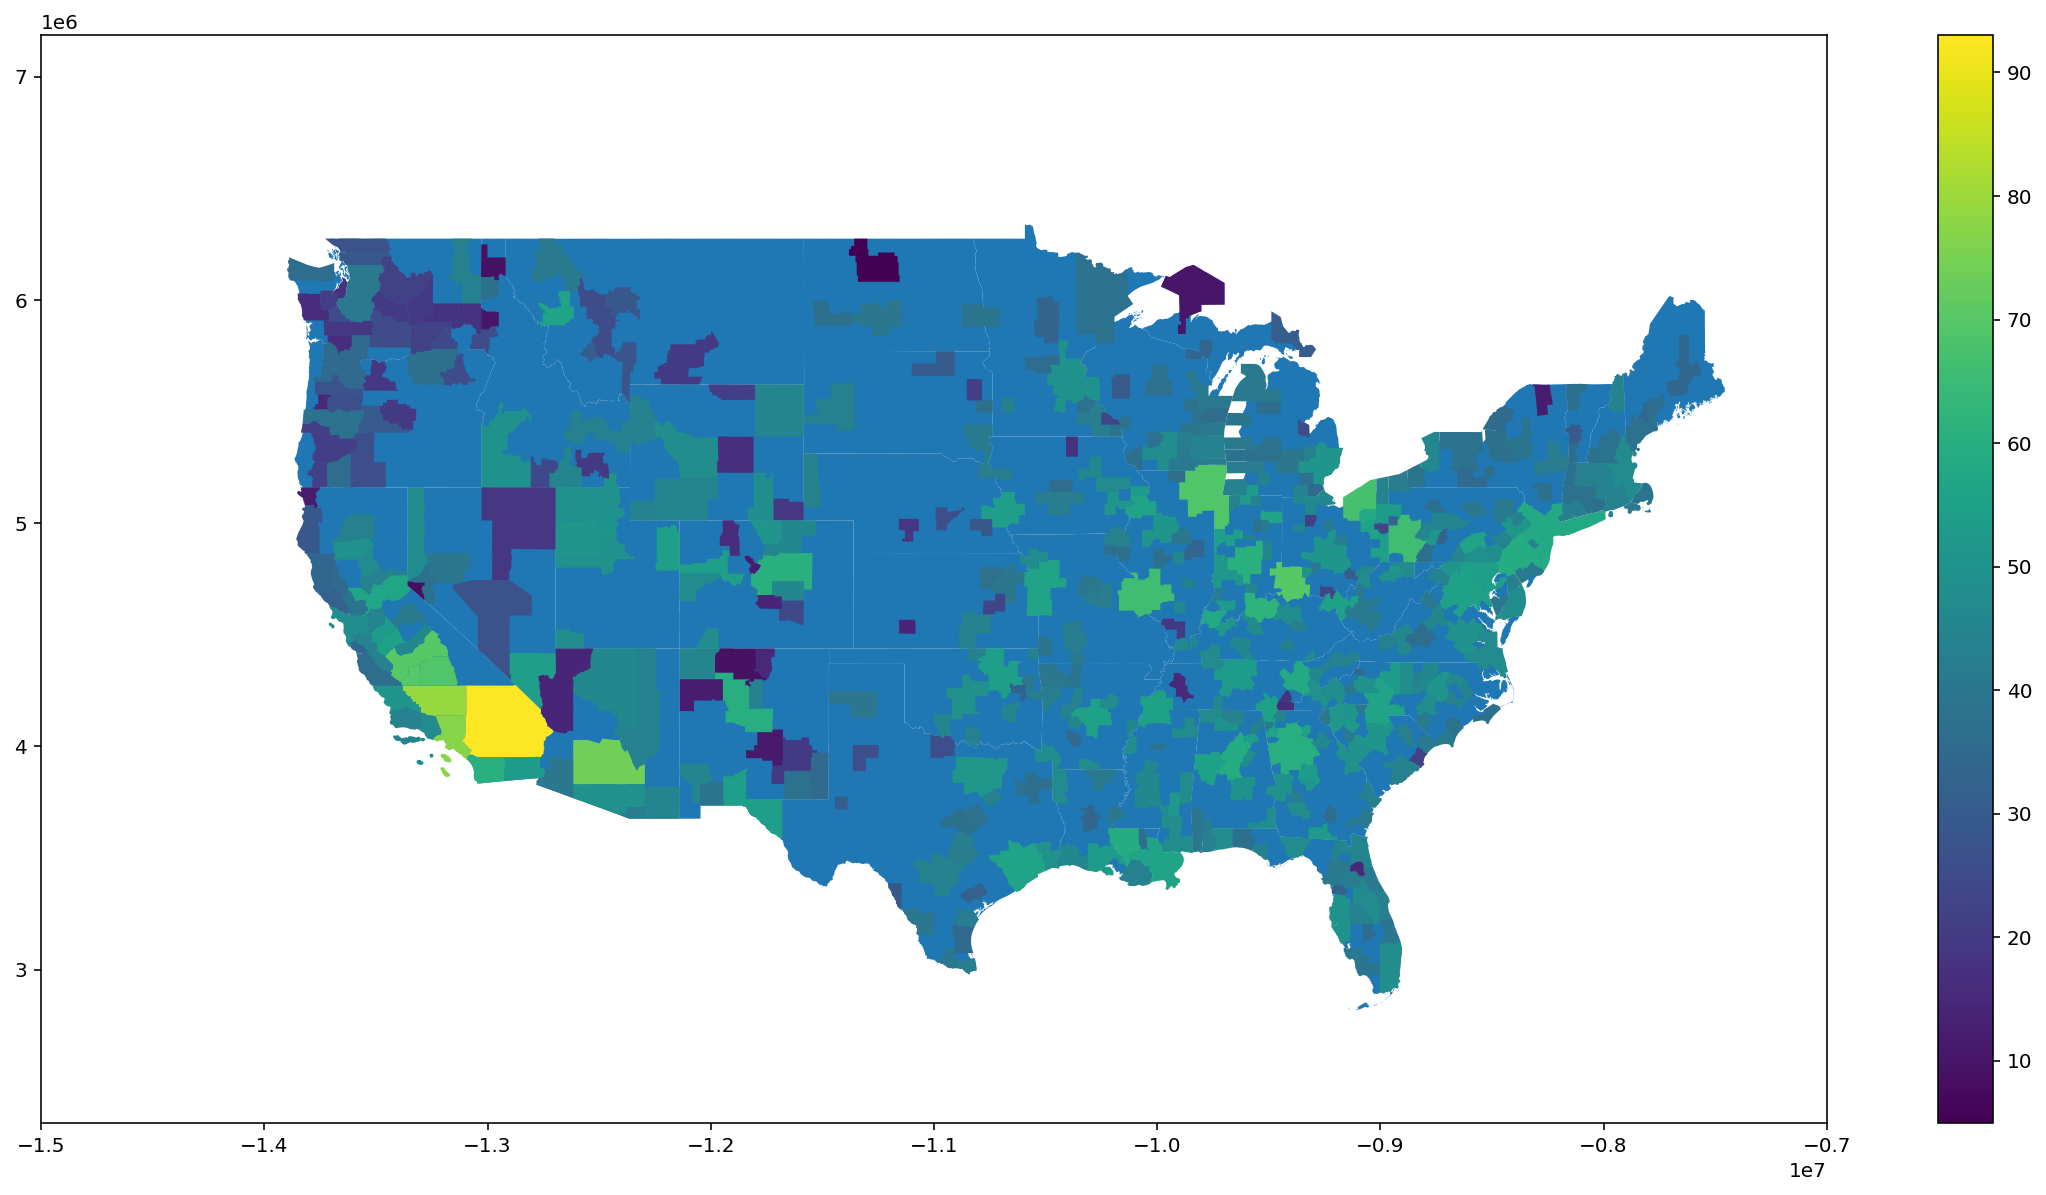

In [72]:
ax = plotUS()
AQI2010g.plot(ax=ax, column='Median AQI', legend=True);

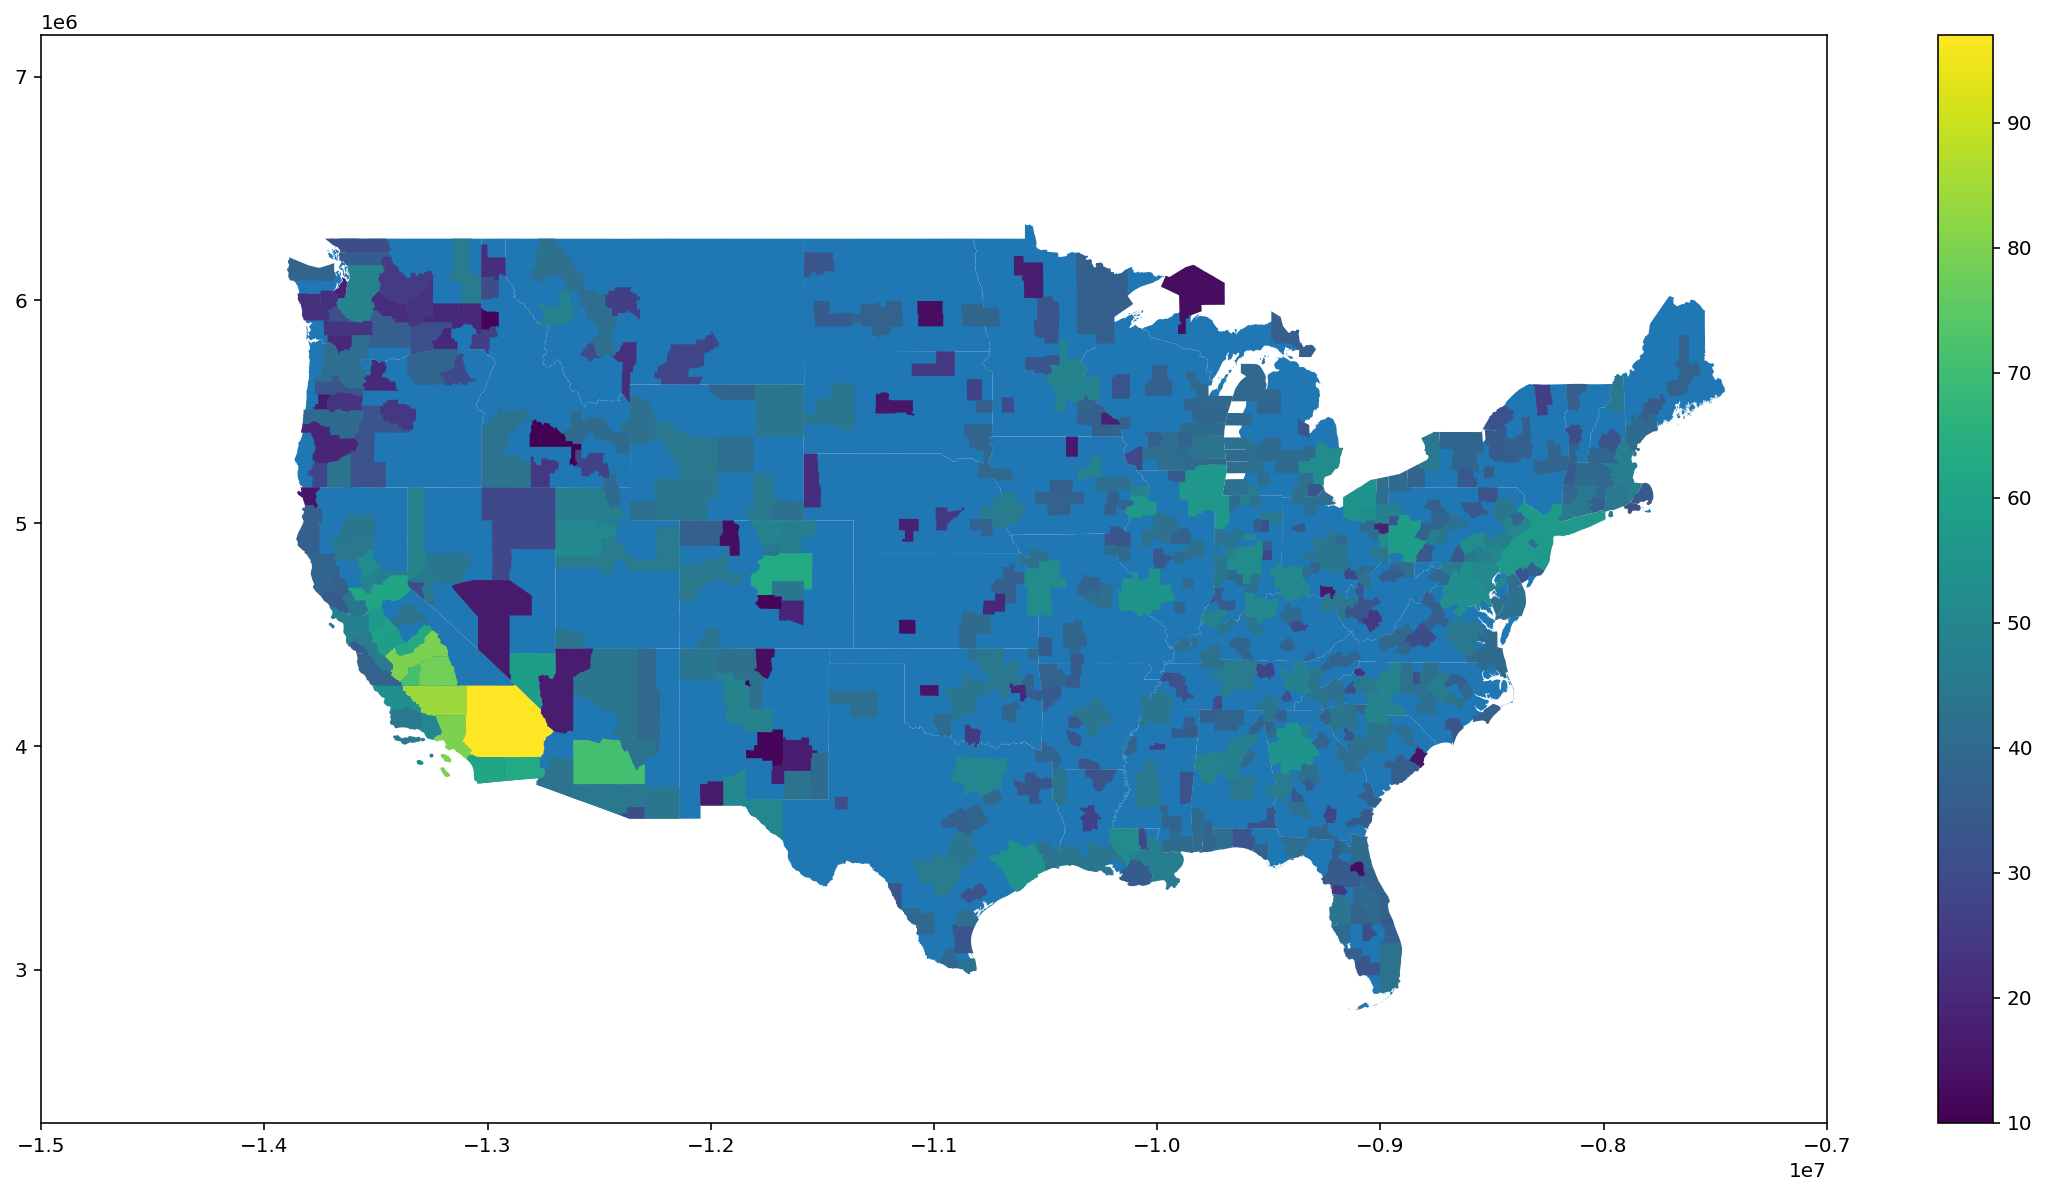

In [43]:
ax = plotUS()
AQI2015g.plot(ax=ax, column='Median AQI', legend=True);

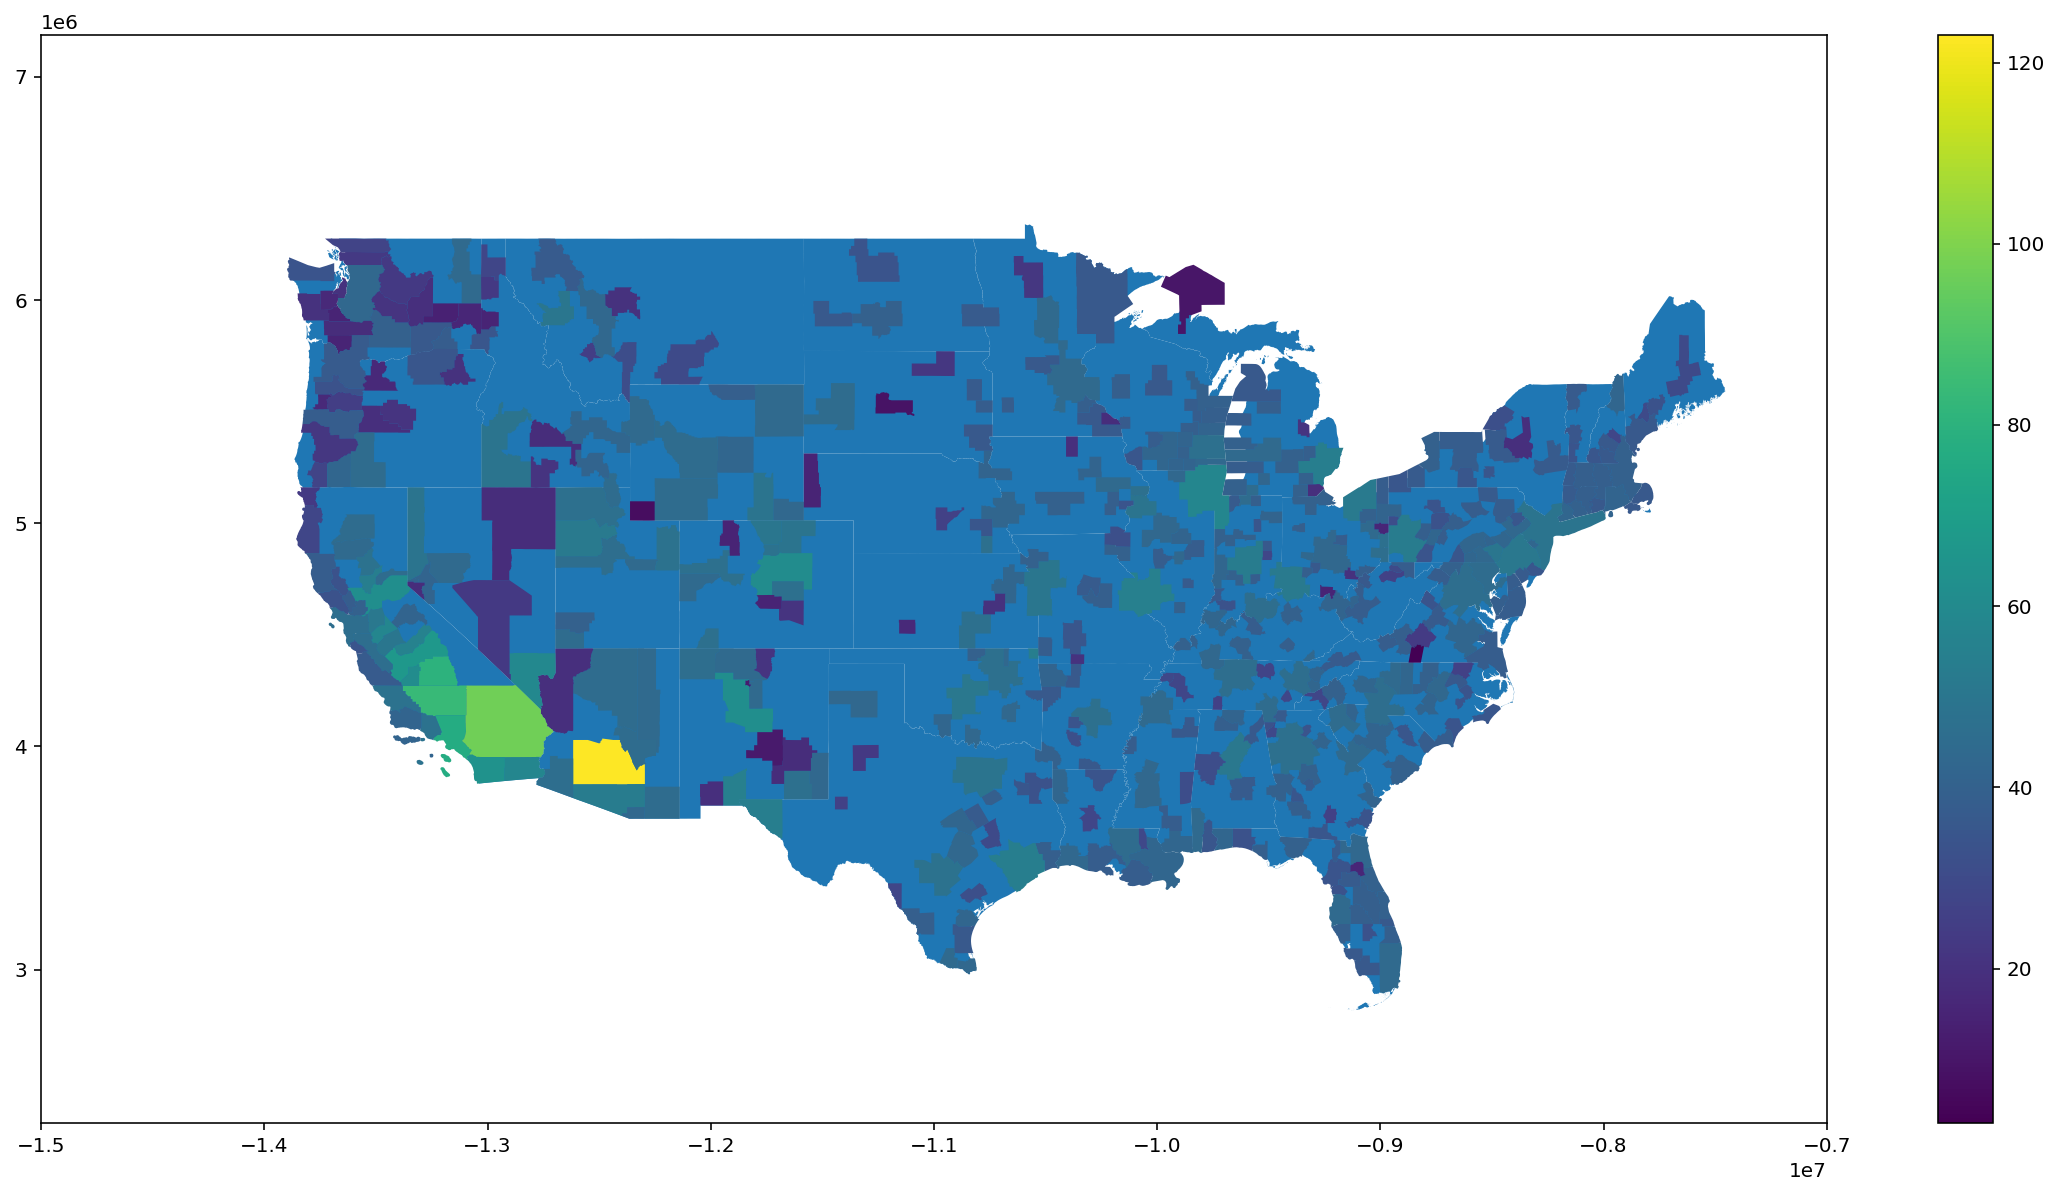

In [44]:
ax = plotUS()
AQI2021g.plot(ax=ax, column='Median AQI', legend=True);

In [74]:
var = AQI2021g
print("US: ", var['Median AQI'].mean())
print("Metro: ", var[var['metro']]['Median AQI'].mean())
print("Liminal: ", var[var['liminal']]['Median AQI'].mean())
print("Small Nonliminal: ", var[var['micro'] & ~var['liminal']]['Median AQI'].mean())

US:  37.93914807302231
Metro:  50.25
Liminal:  33.078947368421055
Small Nonliminal:  31.530864197530864
